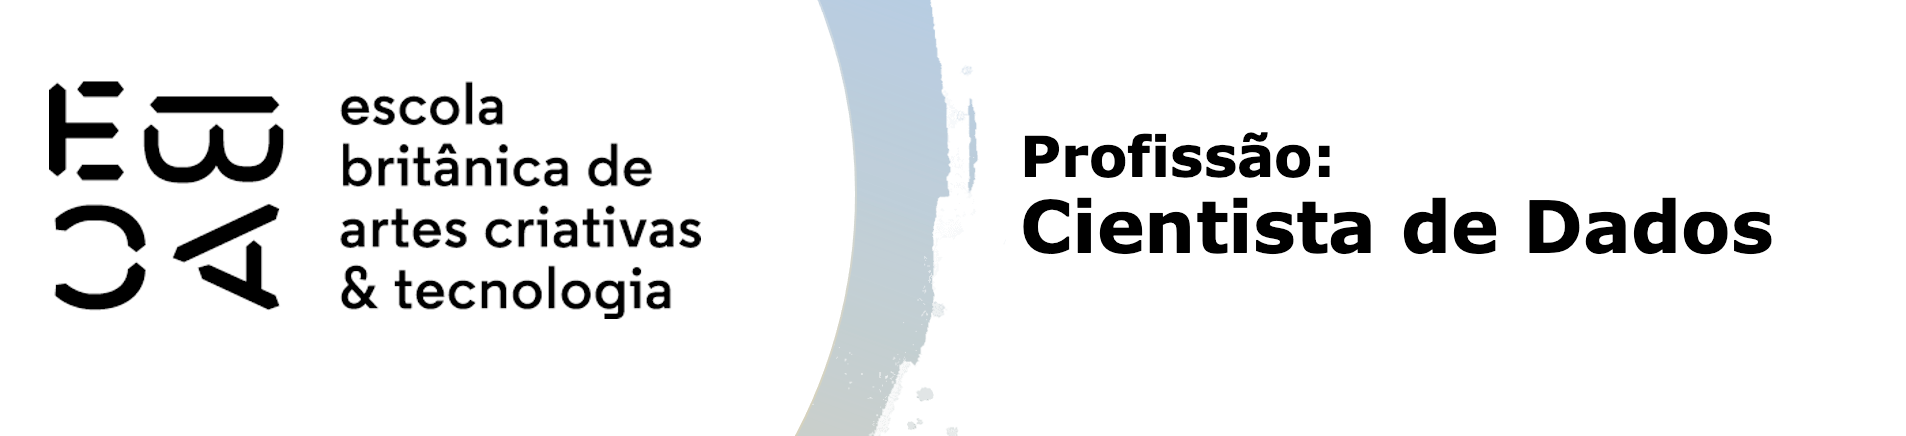

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
os = pd.read_csv('online_shoppers_intention.csv')

In [3]:
os.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
os.Revenue.value_counts(dropna=False)

False    10422
True      1908
Name: Revenue, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
os.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [6]:
os.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [11]:
osi = pd.DataFrame(os, columns = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration'])
osi

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,0,0.0,0,0.0,1,0.000000
1,0,0.0,0,0.0,2,64.000000
2,0,0.0,0,0.0,1,0.000000
3,0,0.0,0,0.0,2,2.666667
4,0,0.0,0,0.0,10,627.500000
...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667
12326,0,0.0,0,0.0,5,465.750000
12327,0,0.0,0,0.0,6,184.250000
12328,4,75.0,0,0.0,15,346.000000


In [18]:
std = osi.groupby(['ProductRelated', 'ProductRelated_Duration']).std()
std

Administrative  \
ProductRelated ProductRelated_Duration                   
0              0.00000                        0.850487   
1              0.00000                        0.238557   
               0.50000                             NaN   
               1.00000                             NaN   
               4.00000                        1.414214   
...                                                ...   
518            11976.72135                         NaN   
534            18504.12621                         NaN   
584            24844.15620                         NaN   
686            23342.08205                         NaN   
705            43171.23338                         NaN   

                                        Administrative_Duration  \
ProductRelated ProductRelated_Duration                            
0              0.00000                                56.556654   
1              0.00000                                26.163250   
               0.50000                                      NaN   
               1.00000                                      NaN   
               4.00000                                64.063874   
...                                                         ...   
518            11976.72135                                  NaN   
534            18504.12621                                  NaN   
584            24844.15620                                  NaN   
686            23342.08205                                  NaN   
705            43171.23338                                  NaN   

                                        Informational  Informational_Duration  
ProductRelated ProductRelated_Duration                                         
0              0.00000                       0.701553                9.743401  
1              0.00000                       0.169634                2.670789  
               0.50000                            NaN                     NaN  
               1.00000                            NaN                     NaN  
               4.00000                       0.000000                0.000000  
...                                               ...                     ...  
518            11976.72135                        NaN                     NaN  
534            18504.12621                        NaN                     NaN  
584            24844.15620                        NaN                     NaN  
686            23342.08205                        NaN                     NaN  
705            43171.23338                        NaN                     NaN  

[11068 rows x 4 columns]

In [19]:
med = osi.groupby(['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration']).mean()
med

ProductRelated  \
Administrative Administrative_Duration Informational Informational_Duration                   
0              0.000000                0             0.000000                     15.790575   
                                       1             0.000000                     27.136364   
                                                     1.000000                     93.000000   
                                                     1.500000                     43.000000   
                                                     2.000000                     23.333333   
...                                                                                     ...   
24             290.860369              6             529.700000                  178.000000   
               468.100663              6             191.866667                  189.000000   
               876.233333              5             625.500000                   34.000000   
26             1561.717567             9             503.722222                  183.000000   
27             853.735949              2             126.500000                  584.000000   

                                                                             ProductRelated_Duration  
Administrative Administrative_Duration Informational Informational_Duration                           
0              0.000000                0             0.000000                             586.384323  
                                       1             0.000000                             998.109933  
                                                     1.000000                            4324.737073  
                                                     1.500000                            1368.484848  
                                                     2.000000                            1418.850946  
...                                                                                              ...  
24             290.860369              6             529.700000                          4339.534423  
               468.100663              6             191.866667                          3428.527381  
               876.233333              5             625.500000                          1588.666667  
26             1561.717567             9             503.722222                          9676.093180  
27             853.735949              2             126.500000                         24844.156200  

[5514 rows x 2 columns]

In [20]:
colunas = med.idxmax(axis=1).values
colunas

array(['ProductRelated_Duration', 'ProductRelated_Duration',
       'ProductRelated_Duration', ..., 'ProductRelated_Duration',
       'ProductRelated_Duration', 'ProductRelated_Duration'], dtype=object)

<AxesSubplot:ylabel='Frequency'>

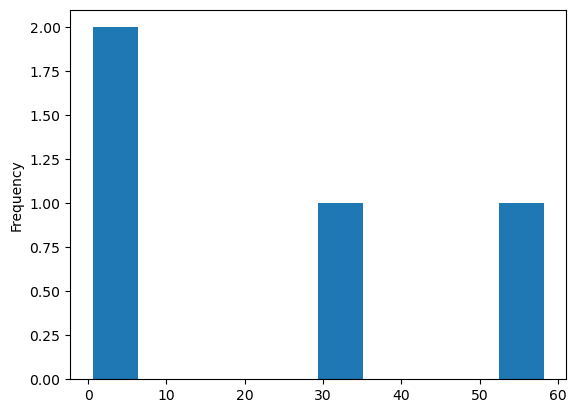

In [24]:
std.std().plot.hist()

In [27]:
std.std().sort_values().tail()

Informational               0.593790
Administrative              1.302065
Informational_Duration     31.713336
Administrative_Duration    58.171261
dtype: float64

<AxesSubplot:ylabel='Frequency'>

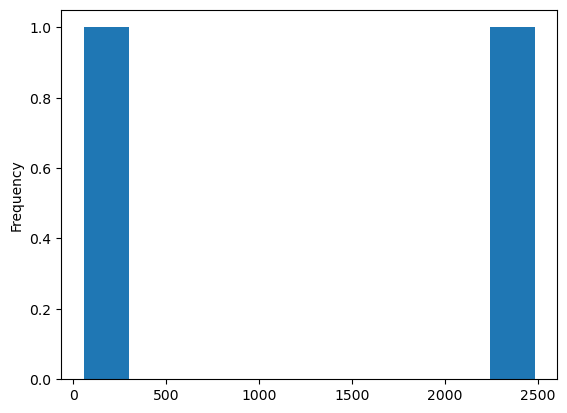

In [28]:
med.std().plot.hist()

In [29]:
med.std().sort_values().tail()

ProductRelated               56.525427
ProductRelated_Duration    2482.366828
dtype: float64

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

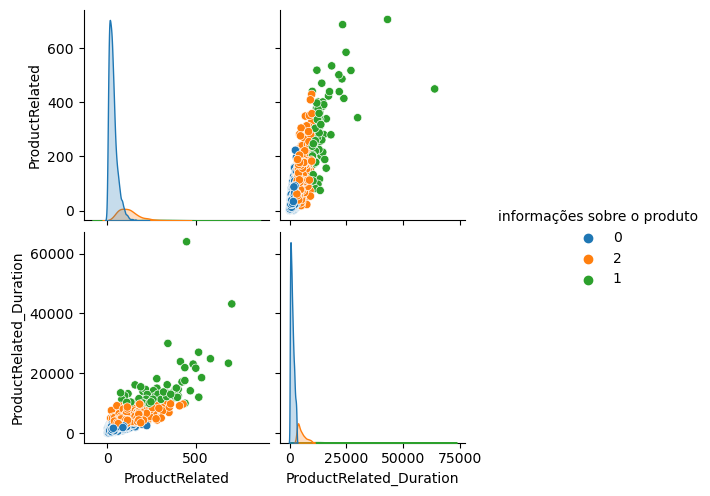

In [37]:
med['informações sobre o produto'] = kmeans.labels_.astype('str')
sns.pairplot(med, hue='informações sobre o produto')

In [43]:
padronizador = StandardScaler()
std_padronizado = padronizador.fit_transform(std)

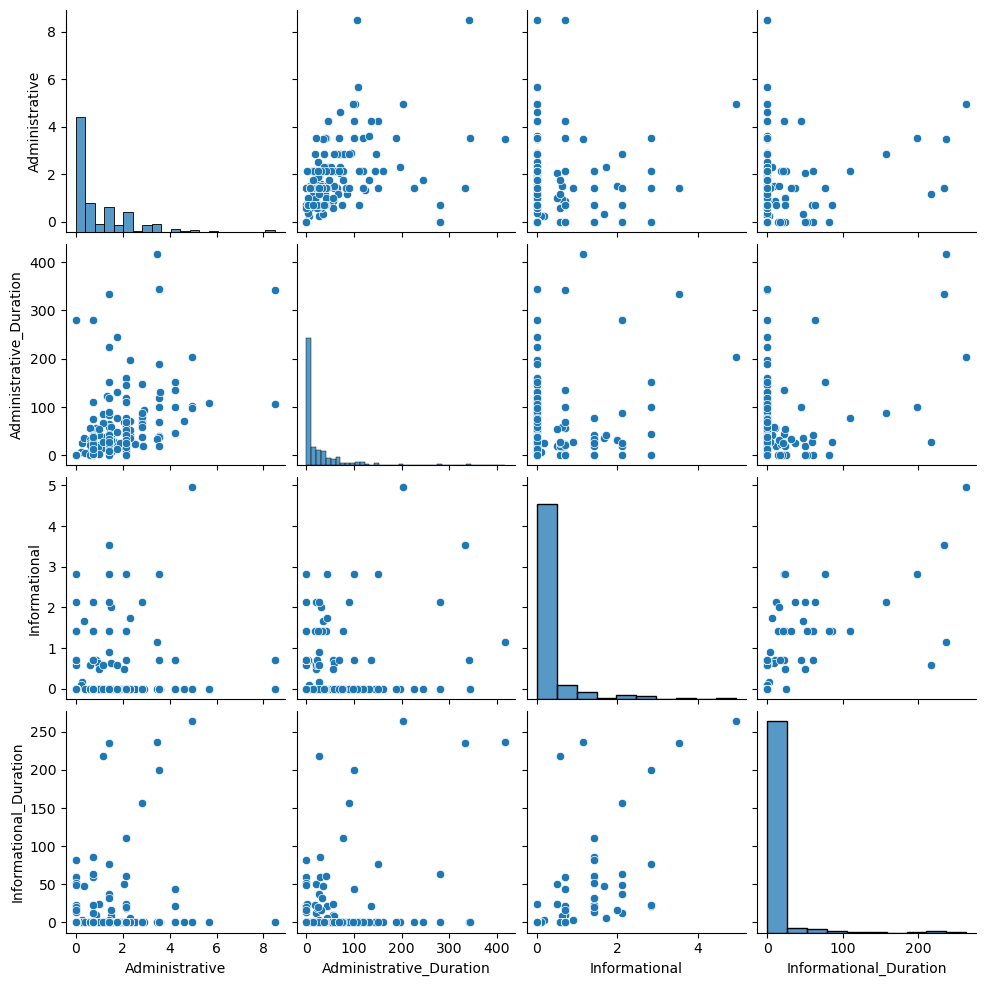

In [45]:
sns.pairplot(std)

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

O grupo de informações sobre o produto aparenta ter mais clientes propensos a compra.